## Exercises
Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

In [1]:
#Imports
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy import stats

import env as e
import wrangle as w
import model as m

### 1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

In [2]:
df = w.get_zillow_data()

In [3]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


### 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

### 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [12]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips,fips_loc,home_age
1207671,3,3.0,2214,325138,1925,3975.17,6037,"Los Angeles, CA",92
1550795,3,3.0,1760,626000,1957,6584.22,6111,"Ventura, CA",60
310060,4,2.5,2322,408544,1971,4602.44,6059,"Orange, CA",46
1246294,4,3.0,2648,783000,1968,8910.22,6059,"Orange, CA",49
458910,4,2.0,1225,125868,1956,1789.08,6037,"Los Angeles, CA",61


In [ ]:
cat_vars = ['bedrooms', 'bathrooms', 'home_age', 'fips_loc']
num_vars = ['area', 'tax_value', 'tax_amount']

In [15]:
def plot_variable_pairs(df):
    cat_vars = ['bedrooms', 'bathrooms', 'home_age', 'fips_loc']
    num_vars = ['area', 'tax_value', 'tax_amount']
    # make correlation plot
    train_corr = train.drop(columns=['fips_loc']).corr()
    plt.figure(figsize=(12,8))
    sns.heatmap(train_corr, cmap='Purples', annot = True, mask= np.triu(train_corr), linewidth=.5)
    plt.show()
    #Pairplot
    sns.pairplot(train[num_vars].sample(1000), corner=True, kind='reg',plot_kws={'line_kws':{'color':'red'}})
    plt.show()

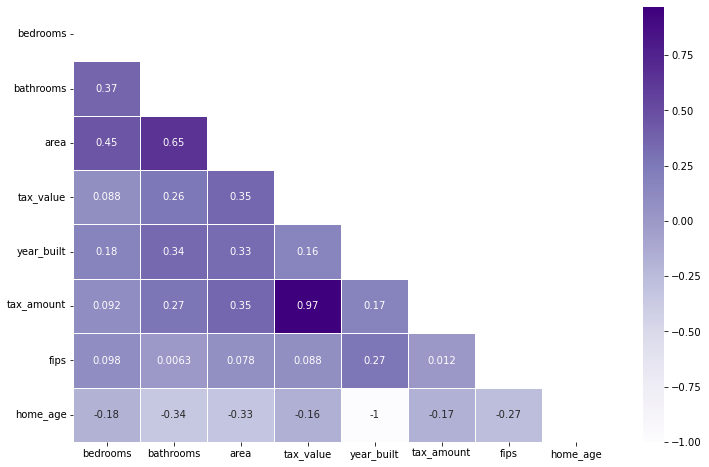

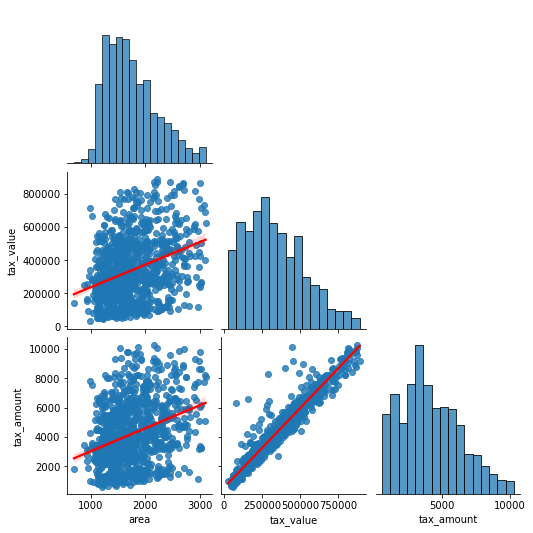

In [16]:
plot_variable_pairs(df)

### 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [26]:
cat= ['bedrooms', 'bathrooms', 'home_age', 'fips_loc']
cont = ['area', 'tax_value', 'tax_amount']

In [27]:
def plot_cat_and_cont(df, cat, cont):
    sns.swarmplot(data=df.sample(100), y='tax_value', x=cont, hue=cat)
    plt.show()
    
    sns.violinplot(data=df.sample(100), y='tax_value', x=cont, hue=cat)
    plt.show()
    
    sns.catplot(data=df.sample(100), y='tax_value', x=cont, hue=cat)
    plt.show()

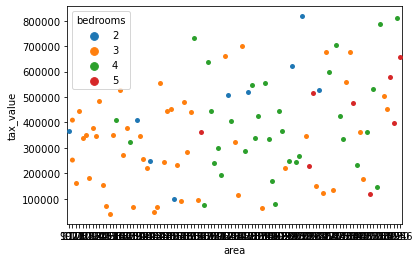

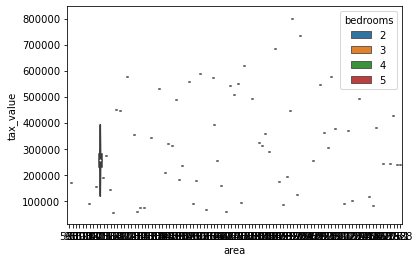

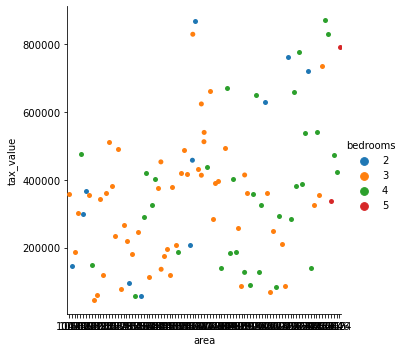

In [29]:
plot_cat_and_cont(train, 'bedrooms', 'area')

### 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

### 6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

### 7. Come up with some initial hypotheses based on your goal of predicting property value.

### 8.  Visualize all combinations of variables in some way.

### 9. Run the appropriate statistical tests where needed.

### 10. What independent variables are correlated with the dependent variable, home value?

### 11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

### 12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

### 13. Explore your dataset with any other visualizations you think will be helpful.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152864 entries, 0 to 2152863
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 115.0 MB


In [5]:
#Clean the zillow data
df = w.clean_zillow(df)

In [6]:
df.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips,fips_loc,home_age
4,4,2.0,3633,296425,2005,6941.39,6037,"Los Angeles, CA",12
6,3,4.0,1620,847770,2011,10244.94,6037,"Los Angeles, CA",6
7,3,2.0,2077,646760,1926,7924.68,6037,"Los Angeles, CA",91
11,0,0.0,1200,5328,1972,91.60,6037,"Los Angeles, CA",45
14,0,0.0,171,6920,1973,255.17,6037,"Los Angeles, CA",44


In [8]:
#Remove outliers
df = w.remove_outliers(df,['bedrooms','bathrooms','area','tax_value','tax_amount'])

In [9]:
df.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips,fips_loc,home_age
7,3,2.0,2077,646760,1926,7924.68,6037,"Los Angeles, CA",91
19,3,2.0,1300,233266,1950,3110.99,6037,"Los Angeles, CA",67
20,3,2.0,1222,290492,1951,3870.25,6037,"Los Angeles, CA",66
23,3,2.5,1821,537949,2013,6173.72,6059,"Orange, CA",4
33,2,2.0,1970,637686,2013,9729.72,6059,"Orange, CA",4


In [ ]:
#Create column for home age using year_built
#train['home_age'] = 2017- train.year_built

### Split the data

In [10]:
#Split data with function from wrangle
train, validate, test = w.train_validate_test_split(df)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980193 entries, 1207671 to 777638
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   bedrooms    980193 non-null  int64  
 1   bathrooms   980193 non-null  float64
 2   area        980193 non-null  int64  
 3   tax_value   980193 non-null  int64  
 4   year_built  980193 non-null  int64  
 5   tax_amount  980193 non-null  float64
 6   fips        980193 non-null  int64  
 7   fips_loc    980193 non-null  object 
 8   home_age    980193 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 74.8+ MB


## Categorical variable exploration

In [ ]:
#Attempting to make function to plot variable pairs
def plot_variable_pairs(df):
    df = w.get_zillow_data()
    df = w.clean_zillow(df)
    df = w.remove_outliers(df,['bedrooms','bathrooms','area','tax_value','tax_amount'])
    train, validate, test = w.train_validate_test_split(df)
    cat_vars = ['bedrooms', 'bathrooms', 'fips_loc']
    for col in cat_vars:
        print(col)
        sns.set_style('whitegrid')
        sns.lmplot(x=col, y=tax_value, data=train)
        plt.show()

In [ ]:
def plot_categorical_and_continuous_vars(df):
    num_vars = ['area', 'tax_value', 'tax_amount']
    cat_vars = ['bedrooms', 'bathrooms', 'fips_loc']
    fig, axs = plt.subplots(len(num_vars), 3, figsize=(16,10))
    for row, col in enumerate(num_vars):
        for clm, col2 in enumerate(cat_vars):
            axs[row,1].plot(df[col], df[col2])
            axs[row,1].set_title(df[col], df[col2])

In [ ]:
## Based on 

In [31]:
cat_vars = ['bedrooms', 'bathrooms', 'home_age', 'fips_loc']

bedrooms
3    510349
4    347504
2     73807
5     48533
Name: bedrooms, dtype: int64
3    52.066175
4    35.452610
2     7.529844
5     4.951372
Name: bedrooms, dtype: float64


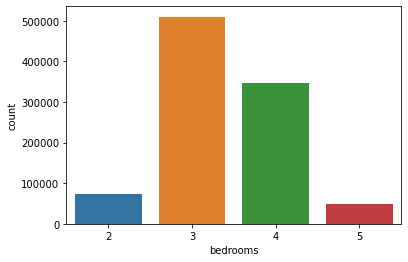

bathrooms
2.00    634487
3.00    233229
2.50     90894
1.50     21582
1.75         1
Name: bathrooms, dtype: int64
2.00    64.730823
3.00    23.794192
2.50     9.273072
1.50     2.201811
1.75     0.000102
Name: bathrooms, dtype: float64


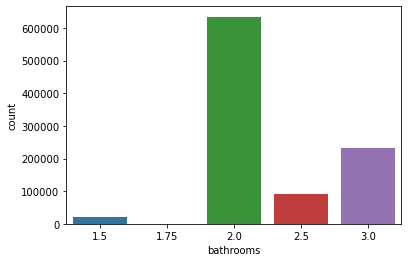

home_age
62     48266
61     36124
63     35802
53     32221
64     27626
       ...  
139        1
216        1
147        1
205        1
135        1
Name: home_age, Length: 143, dtype: int64
62     4.924132
61     3.685397
63     3.652546
53     3.287210
64     2.818425
         ...   
139    0.000102
216    0.000102
147    0.000102
205    0.000102
135    0.000102
Name: home_age, Length: 143, dtype: float64


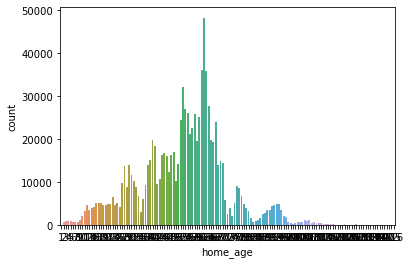

fips_loc
Los Angeles, CA    603814
Orange, CA         288373
Ventura, CA         88006
Name: fips_loc, dtype: int64
Los Angeles, CA    61.601542
Orange, CA         29.420022
Ventura, CA         8.978436
Name: fips_loc, dtype: float64


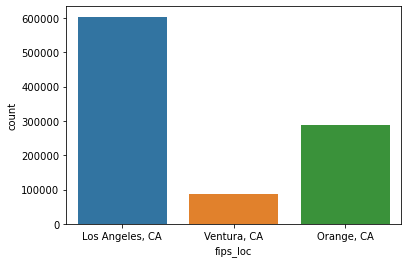

In [32]:
for col in cat_vars:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train)
    plt.show()

### Bedrooms

In [33]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips,fips_loc,home_age
1207671,3,3.0,2214,325138,1925,3975.17,6037,"Los Angeles, CA",92
1550795,3,3.0,1760,626000,1957,6584.22,6111,"Ventura, CA",60
310060,4,2.5,2322,408544,1971,4602.44,6059,"Orange, CA",46
1246294,4,3.0,2648,783000,1968,8910.22,6059,"Orange, CA",49
458910,4,2.0,1225,125868,1956,1789.08,6037,"Los Angeles, CA",61


In [34]:
train.bedrooms.value_counts()

3    510349
4    347504
2     73807
5     48533
Name: bedrooms, dtype: int64

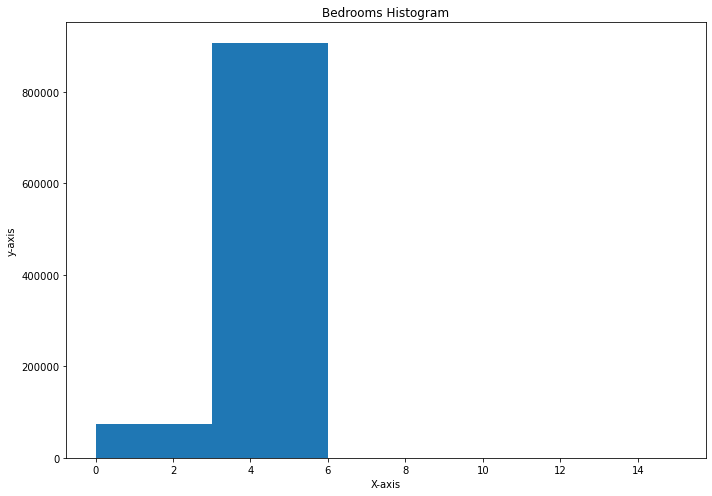

In [35]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7), tight_layout = True)
ax.hist(train.bedrooms, bins = [0, 3, 6, 9, 12, 15])
plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.title('Bedrooms Histogram')
 
# Show plot
plt.show()

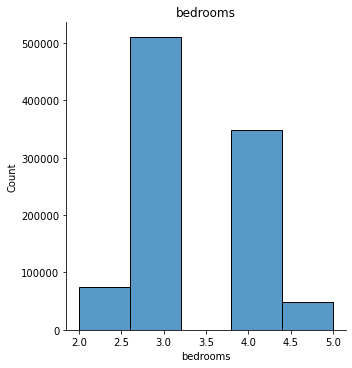

In [36]:
#Displot
sns.displot(x='bedrooms', data=train, bins=5)
plt.title('bedrooms')
plt.show()

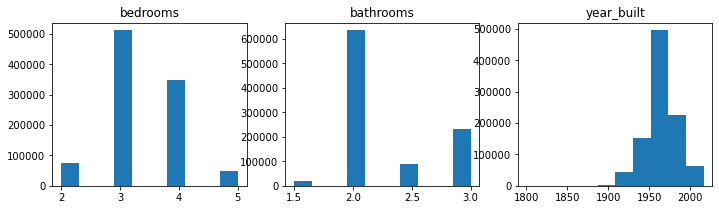

In [37]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['bedrooms', 'bathrooms', 'year_built']
for i, col in enumerate(cols):
    # i starts at 0, but plot nos should start at 1
    subplot_num = i+1
    # Create subplot.
    plt.subplot(1,4,subplot_num)
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    train[col].hist(bins=10)
    # Hide gridlines.
    plt.grid(False)

In [38]:
#Descriptive statistics
print(f'Mean bedrooms = {train.bedrooms.mean()}')
print(f'Median Bedrooms = {train.bedrooms.median()}')
print(f'Mode Bedrooms = {train.bedrooms.mode()}')
print(f'Max Bedrooms = {train.bedrooms.max()}')
print(f'Min Bedrooms = {train.bedrooms.min()}')

Mean bedrooms = 3.378255098740758
Median Bedrooms = 3.0
Mode Bedrooms = 0    3
Name: bedrooms, dtype: int64
Max Bedrooms = 5
Min Bedrooms = 2


### Bathrooms

In [39]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips,fips_loc,home_age
1207671,3,3.0,2214,325138,1925,3975.17,6037,"Los Angeles, CA",92
1550795,3,3.0,1760,626000,1957,6584.22,6111,"Ventura, CA",60
310060,4,2.5,2322,408544,1971,4602.44,6059,"Orange, CA",46
1246294,4,3.0,2648,783000,1968,8910.22,6059,"Orange, CA",49
458910,4,2.0,1225,125868,1956,1789.08,6037,"Los Angeles, CA",61


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980193 entries, 1207671 to 777638
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   bedrooms    980193 non-null  int64  
 1   bathrooms   980193 non-null  float64
 2   area        980193 non-null  int64  
 3   tax_value   980193 non-null  int64  
 4   year_built  980193 non-null  int64  
 5   tax_amount  980193 non-null  float64
 6   fips        980193 non-null  int64  
 7   fips_loc    980193 non-null  object 
 8   home_age    980193 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 107.0+ MB


In [41]:
train.bathrooms.value_counts()

2.00    634487
3.00    233229
2.50     90894
1.50     21582
1.75         1
Name: bathrooms, dtype: int64

In [42]:
#Descriptive statistics
print(f'Mean Bathrooms = {train.bathrooms.mean()}')
print(f'Median Bathrooms = {train.bathrooms.median()}')
print(f'Mode Bathrooms = {train.bathrooms.mode()}')
print(f'Max Bathrooms = {train.bathrooms.max()}')
print(f'Min Bathrooms = {train.bathrooms.min()}')

Mean Bathrooms = 2.2732979627481527
Median Bathrooms = 2.0
Mode Bathrooms = 0    2.0
Name: bathrooms, dtype: float64
Max Bathrooms = 3.0
Min Bathrooms = 1.5


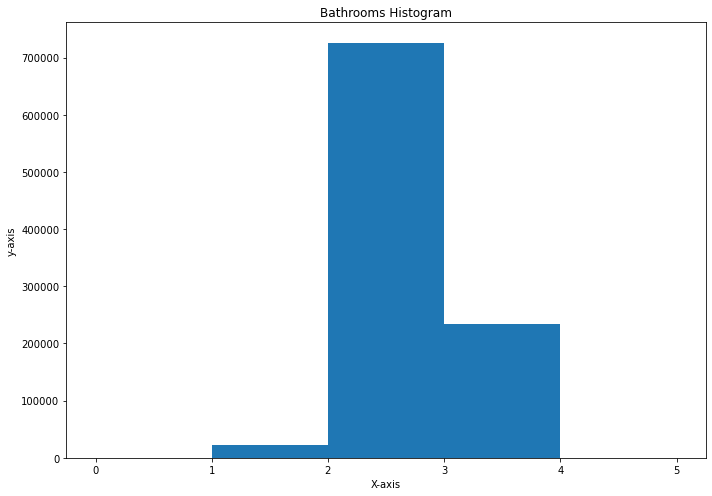

In [43]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7), tight_layout = True)
ax.hist(train.bathrooms, bins = [0, 1,2,3,4,5])
plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.title('Bathrooms Histogram')
 
# Show plot
plt.show()

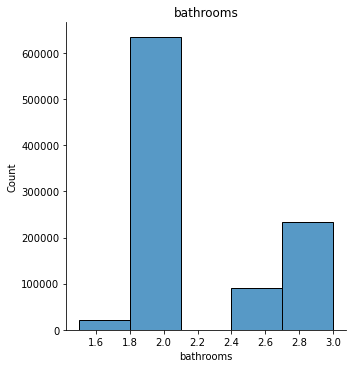

In [44]:
#Displot
sns.displot(x='bathrooms', data=train, bins=5)
plt.title('bathrooms')
plt.show()

### Year_Built

In [45]:
train.year_built.value_counts()

1955    48266
1956    36124
1954    35802
1964    32221
1953    27626
        ...  
1878        1
1801        1
1870        1
1812        1
1882        1
Name: year_built, Length: 143, dtype: int64

In [46]:
#Descriptive statistics
print(f'Mean Year Built = {train.year_built.mean()}')
print(f'Median Year Built = {train.year_built.median()}')
print(f'Mode Year Built = {train.year_built.mode()}')
print(f'Max Year Built = {train.year_built.max()}')
print(f'Min Year Built = {train.year_built.min()}')

Mean Year Built = 1963.8266280212163
Median Year Built = 1962.0
Mode Year Built = 0    1955
Name: year_built, dtype: int64
Max Year Built = 2016
Min Year Built = 1801


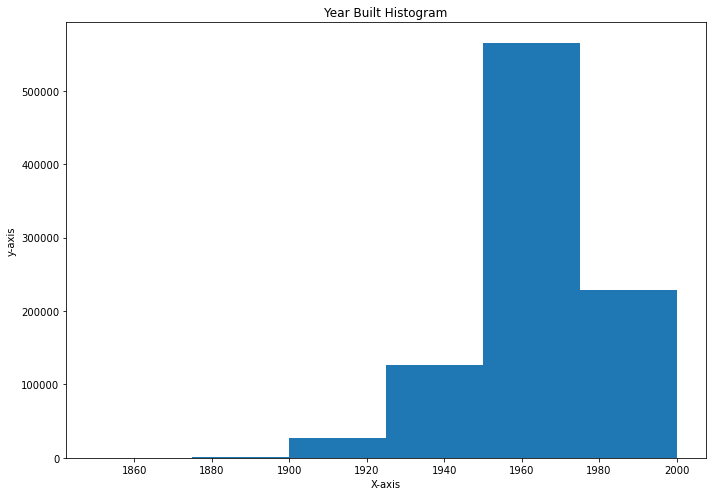

In [47]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7), tight_layout = True)
ax.hist(train.year_built, bins = [1850, 1875, 1900, 1925, 1950, 1975, 2000])
plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.title('Year Built Histogram')
 
# Show plot
plt.show()

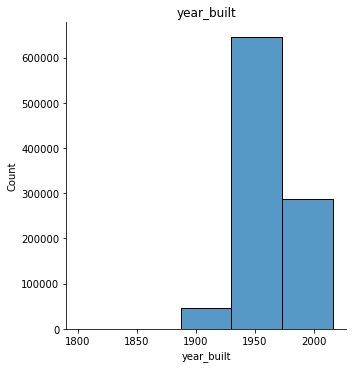

In [48]:
#Displot
sns.displot(x='year_built', data=train, bins=5)
plt.title('year_built')
plt.show()

### FIPS

In [49]:
train.fips.value_counts()

6037    603814
6059    288373
6111     88006
Name: fips, dtype: int64

In [ ]:
### FIPS--labeling fips--placed into clean file
    ##zillow['fips'] = zillow.fips.astype(int)
    ##zillow['fips_loc'] = zillow.fips.replace({6037:'Los Angeles, CA',
                       ##6059:'Orange, CA',
                       ##6111:'Ventura, CA'})

In [50]:
#Descriptive Statistics
print(f'Median FIPS = {train.fips.median()}')
print(f'Mode FIPS = {train.fips.mode()}')

Median FIPS = 6037.0
Mode FIPS = 0    6037
Name: fips, dtype: int64


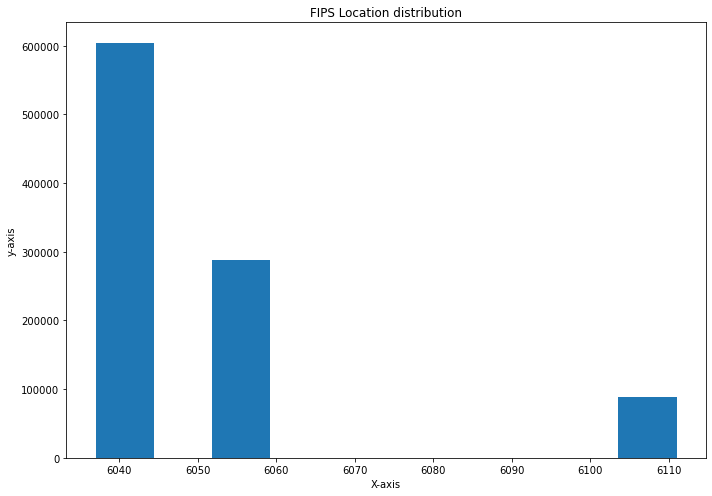

In [51]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7), tight_layout = True)
ax.hist(train.fips)
plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.title('FIPS Location distribution')
 
# Show plot
plt.show()

## Univariate Exploration of Continuous Variables

In [52]:
num_vars = ['area', 'tax_value', 'tax_amount']
cat_vars = ['bedrooms', 'bathrooms', 'fips_loc']

In [ ]:
train.head()

Mean area is: 1751.671008668701


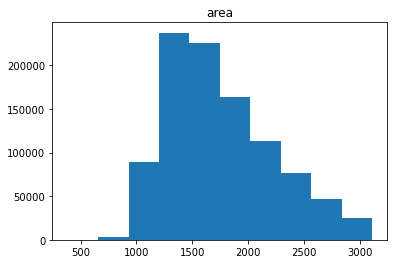

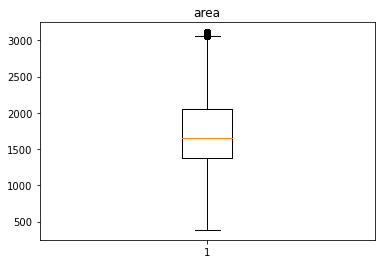

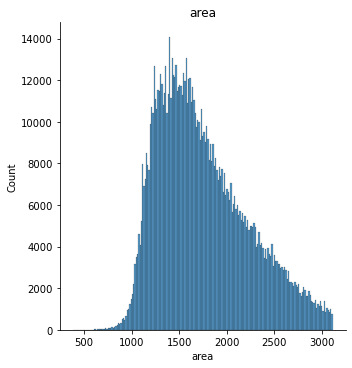

Mean tax_value is: 341251.4721315088


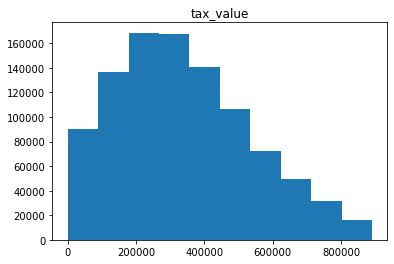

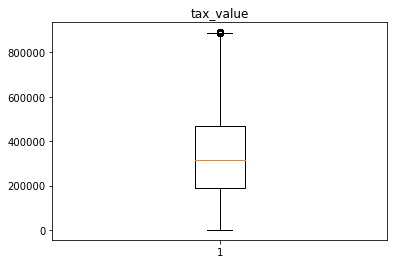

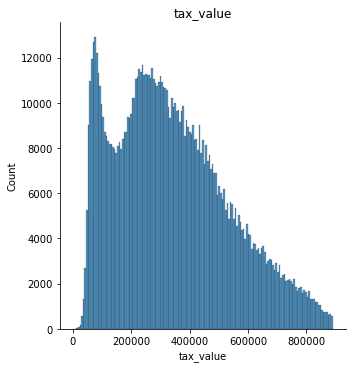

Mean tax_amount is: 4210.435544091889


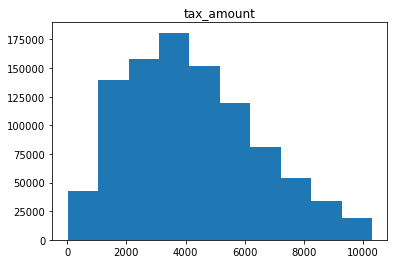

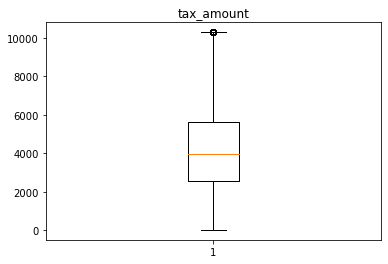

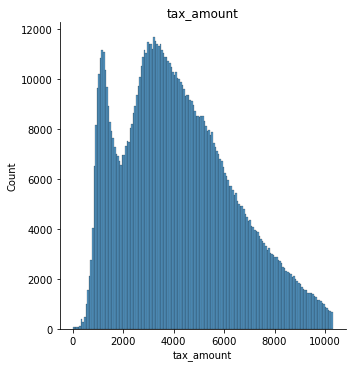

In [53]:
#Visualize other numeric data
# Plot numeric columns
for col in num_vars:
    print(f'Mean {col} is: {train[col].mean()}')
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()
    sns.displot(train[col])
    plt.title(col)
    plt.show()

### Area (Square Footage)

In [54]:
#Descriptive statistics
print(f'Mean Area = {train.area.mean()}')
print(f'Median Area = {train.area.median()}')
print(f'Mode Area = {train.area.mode()}')
print(f'Max Area = {train.area.max()}')
print(f'Min Area = {train.area.min()}')

Mean Area = 1751.671008668701
Median Area = 1658.0
Mode Area = 0    1200
Name: area, dtype: int64
Max Area = 3112
Min Area = 384


### Tax Value (Price)

In [55]:
train.tax_value.mean()

341251.4721315088

In [56]:
train.groupby('bedrooms').tax_value.mean()

bedrooms
2    330678.571030
3    325650.178627
4    360076.915293
5    386592.618363
Name: tax_value, dtype: float64

In [57]:
#Descriptive statistics
print(f'Mean Tax Value = {train.tax_value.mean()}')
print(f'Median Tax Value = {train.tax_value.median()}')
print(f'Mode Tax Value = {train.tax_value.mode()}')
print(f'Max Tax Value = {train.tax_value.max()}')
print(f'Min Tax Value = {train.tax_value.min()}')

Mean Tax Value = 341251.4721315088
Median Tax Value = 315745.0
Mode Tax Value = 0    500000
Name: tax_value, dtype: int64
Max Tax Value = 890750
Min Tax Value = 22


### Tax Amount

In [58]:
#Descriptive statistics
print(f'Mean Tax Amount = {train.tax_amount.mean()}')
print(f'Median Tax Amount = {train.tax_amount.median()}')
print(f'Mode Tax Amount = {train.tax_amount.mode()}')
print(f'Max Tax Amount = {train.tax_amount.max()}')
print(f'Min Tax Amount = {train.tax_amount.min()}')

Mean Tax Amount = 4210.435544091889
Median Tax Amount = 3943.36
Mode Tax Amount = 0    345.72
Name: tax_amount, dtype: float64
Max Tax Amount = 10301.98
Min Tax Amount = 16.48


## Multivariate Analysis

In [59]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips,fips_loc,home_age
1207671,3,3.0,2214,325138,1925,3975.17,6037,"Los Angeles, CA",92
1550795,3,3.0,1760,626000,1957,6584.22,6111,"Ventura, CA",60
310060,4,2.5,2322,408544,1971,4602.44,6059,"Orange, CA",46
1246294,4,3.0,2648,783000,1968,8910.22,6059,"Orange, CA",49
458910,4,2.0,1225,125868,1956,1789.08,6037,"Los Angeles, CA",61


In [60]:
#Taking a sample to help speed up visualizations
sample = train.sample(frac=0.25)

In [61]:
len(sample)

245048

In [62]:
# create the correlation matrix using pandas .corr()
zillow_corr = sample.drop(columns='fips_loc').corr(method='pearson')

In [63]:
zillow_corr

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips,home_age
bedrooms,1.000000,0.363064,0.444198,0.084377,0.180799,0.087276,0.098757,-0.180799
bathrooms,0.363064,1.000000,0.652743,0.261451,0.346722,0.274739,0.008788,-0.346722
area,0.444198,0.652743,1.000000,0.349194,0.332686,0.347928,0.081868,-0.332686
tax_value,0.084377,0.261451,0.349194,1.000000,0.164461,0.967336,0.087255,-0.164461
year_built,0.180799,0.346722,0.332686,0.164461,1.000000,0.173653,0.267491,-1.000000
tax_amount,0.087276,0.274739,0.347928,0.967336,0.173653,1.000000,0.010116,-0.173653
fips,0.098757,0.008788,0.081868,0.087255,0.267491,0.010116,1.000000,-0.267491
home_age,-0.180799,-0.346722,-0.332686,-0.164461,-1.000000,-0.173653,-0.267491,1.000000


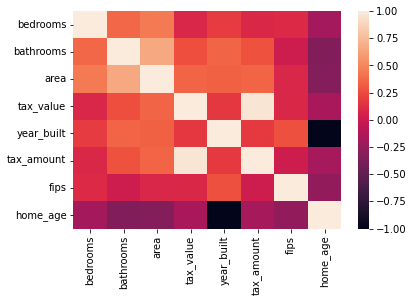

In [64]:
# pass my correlation matrix to Seaborn's heatmap
sns.heatmap(zillow_corr)
plt.show()

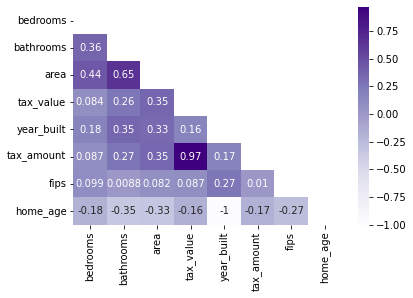

In [65]:
# pass my correlation matrix to Seaborn's heatmap with customization
sns.heatmap(zillow_corr, cmap='Purples', annot=True, 
            mask=np.triu(zillow_corr))
plt.show()

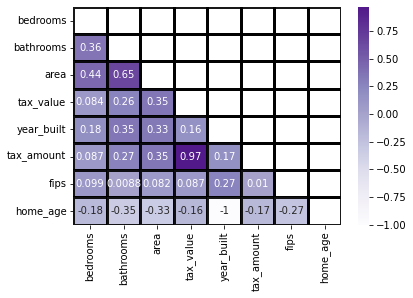

In [66]:
# pass my correlation matrix to Seaborn's heatmap with more customization! 
kwargs = {'alpha':.9,
          'linewidth':3, 
          'linestyle':'-',
          'linecolor':'black'}

sns.heatmap(zillow_corr, cmap='Purples', annot=True, 
            mask=np.triu(zillow_corr), **kwargs)
plt.show()

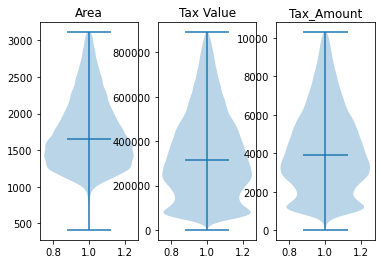

In [67]:
#Violin Plot
area = sample.area
tax_value = sample.tax_value
tax_amount = sample.tax_amount

# Create figure with three axes
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

# Plot violin plot on axes 1
ax1.violinplot(area, showmedians=True)
ax1.set_title('Area')

# Plot violin plot on axes 2
ax2.violinplot(tax_value, showmedians=True)
ax2.set_title('Tax Value')

# Plot violin plot on axes 3
ax3.violinplot(tax_amount, showmedians=True)
ax3.set_title('Tax_Amount')

plt.show()

## Bivariate analysis

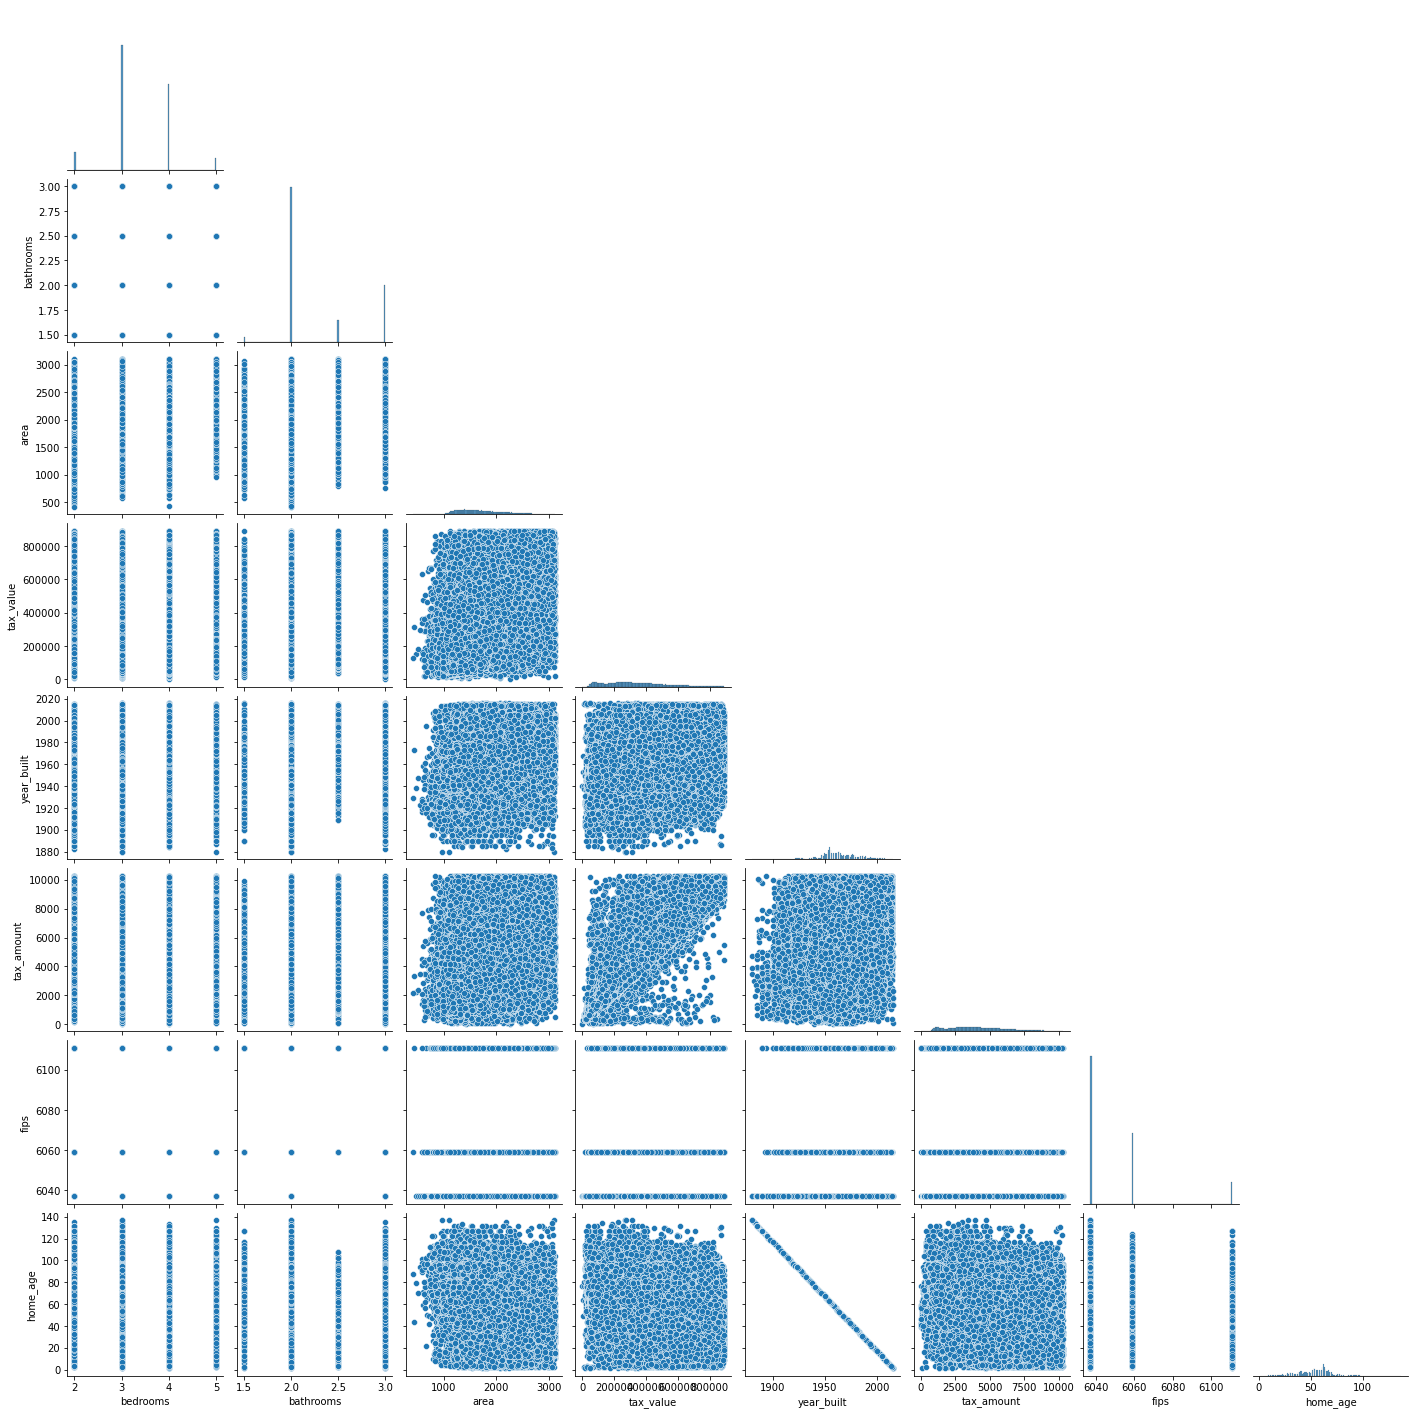

In [68]:
# We can drop the redundant information in the upper right half of the chart if we like.
sns.pairplot(data=sample.drop(columns='fips_loc'),
            corner=True)
plt.show()

## Continuous vs. Continous

<AxesSubplot:xlabel='tax_amount', ylabel='tax_value'>

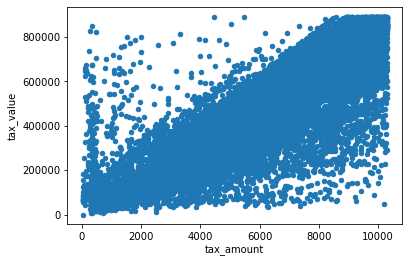

In [69]:
#Scatter
sample.plot.scatter(x = 'tax_amount', y = 'tax_value')

## Discrete vs. Continuous

KeyboardInterrupt: 

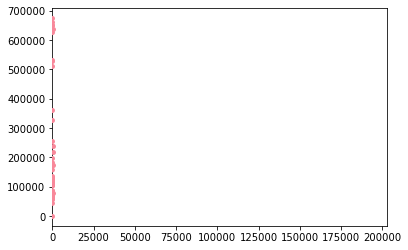

In [70]:
sns.swarmplot(x='tax_amount', y='tax_value', data=sample)

### Area

In [ ]:
sample.head()

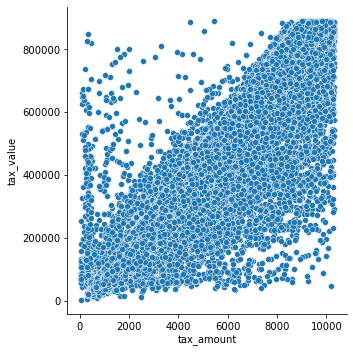

In [71]:
sns.relplot(data=sample, x='tax_amount', y='tax_value')
plt.show()

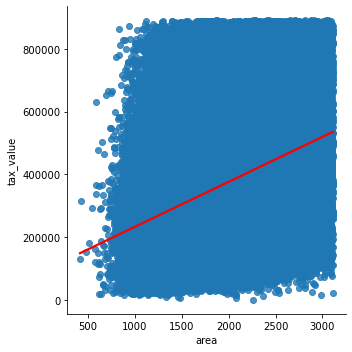

In [72]:
# I can really pop that line color if I want
sns.lmplot(data=sample, x='area', y='tax_value',
           line_kws={'color':'red'})
plt.show()

# Testing Relationships

### Variance Inflation Factor

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
train.head(2)

In [ ]:
X = train[['bedrooms', 'bathrooms', 'area', 'home_age', 'fips', 'tax_amount']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data

### Running Pearson's Correlation between Square Footage (Area) vs Tax Value

In [ ]:
corr, p = stats.pearsonr(train.area, train.tax_value)
corr, p

#### Significant Relationship

### Running Spearman's Correlation between Tax_amount vs Tax Value

In [73]:
# Use a scipy stats function spearmanr to calculate the correlation coefficient and the p-value.

r, p_value = stats.spearmanr(train.tax_amount, train.tax_value)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.9710222970529313
P-value: 0.0


In [74]:
for col in cols:
    r, p_value = stats.spearmanr(train['tax_value'], 
                                 train[col])
    print(f'Comparing tax_value with {col}')
    print(f'Correlation Coefficient: {r}\nP-value: {p_value}\n')
    print('---------------------------\n')

Comparing tax_value with bedrooms
Correlation Coefficient: 0.09012624900650991
P-value: 0.0

---------------------------

Comparing tax_value with bathrooms
Correlation Coefficient: 0.26531185656116757
P-value: 0.0

---------------------------

Comparing tax_value with year_built
Correlation Coefficient: 0.16545478653927514
P-value: 0.0

---------------------------



#### Coefficient is very high

### Comparing Categorical and Categorical Variables

In [ ]:
train.info()

In [ ]:
#Running Chi-Square Test between bedrooms and bathrooms


In [79]:
LA = train[train.fips_loc == 'Los Angeles, CA']
Ventura = train[train.fips_loc == 'Ventura, CA']
Orange = train[train.fips_loc == 'Orange, CA']

In [81]:
LA.tax_value.mean()

320739.7680991166